## Visualize results NARMAX experiments

In [1]:
using Revise
using JLD
using MAT
using Statistics
using StatsPlots
using LaTeXStrings
using Plots
pyplot();

In [2]:
alpha = 0.1
linewidth = 2;
styles = [:solid, :dash, :dot, :dashdot];

In [3]:
T_trn = length(4.05*1e4:131072);

### Root Mean Squared Error

In [4]:
model_orders = [4,7,10,13]
which_orders = [1,2,3,4]
num_orders = length(which_orders)

RMS_sim_FEM = zeros(num_orders,)
RMS_prd_FEM = zeros(num_orders,)
RMS_sim_RLS = zeros(num_orders,)
RMS_prd_RLS = zeros(num_orders,)
RMS_sim_ILS = zeros(num_orders,)
RMS_prd_ILS = zeros(num_orders,)

for (ii,order) in enumerate(model_orders)

    RMS_prd_FEM[ii] = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "RMS_prd_FEM")
    RMS_sim_FEM[ii] = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "RMS_sim_FEM")

    RMS_prd_RLS[ii] = load("results/silverbox-NARMAX-RLS_order"*string(order)*"_results.jld", "RMS_prd_RLS")
    RMS_sim_RLS[ii] = load("results/silverbox-NARMAX-RLS_order"*string(order)*"_results.jld", "RMS_sim_RLS")

    ILS_data = matread("results/silverbox-NARMAX-ILS_order"*string(order)*"_results.mat")
    RMS_prd_ILS[ii] = ILS_data["RMS_prd_ILS"]
    RMS_sim_ILS[ii] = ILS_data["RMS_sim_ILS"]

end    

In [5]:
[RMS_prd_ILS RMS_prd_RLS RMS_prd_FEM] .* 1e3

4×3 Array{Float64,2}:
 NaN  19.8065   19.7788
 NaN   2.2635    1.54989
 NaN   1.74146   0.229618
 NaN   2.90047   0.253701

In [6]:
[RMS_sim_ILS RMS_sim_RLS RMS_sim_FEM] .* 1e3

4×3 Array{Float64,2}:
  49.5645   54.1056   49.6495
  16.5123   54.1049   10.234
   1.13534  54.1042    1.63864
 NaN        54.1035  NaN

### Free Energy

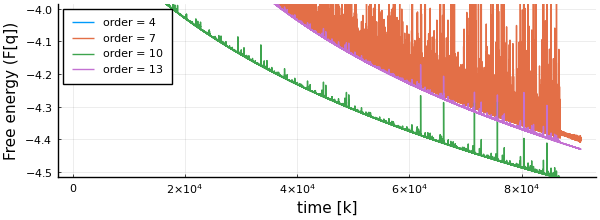

In [7]:
model_orders = [4,7,10,13]
num_orders = length(model_orders)

FE_m = zeros(T_trn, num_orders)

for (ii,order) in enumerate(model_orders)
    
   Fq = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "Fq")
   FE_m[:,ii] = Fq[:,end]
    
end

plot( 1:T_trn, FE_m[:,1], label="order = "*string(model_orders[1]), xlabel="time [k]", ylabel="Free energy (F[q])")
plot!(1:T_trn, FE_m[:,2], label="order = "*string(model_orders[2]))
plot!(1:T_trn, FE_m[:,3], label="order = "*string(model_orders[3]))
plot!(1:T_trn, FE_m[:,4], label="order = "*string(model_orders[4]), ylims=[-4.5, -4.], size=(600,220))

In [8]:
FE_m[end,:]

4-element Array{Float64,1}:
 -2.871528778908239
 -4.401678007667684
 -4.537368070511775
 -4.4303046404507285